## Bank Customer EDA & Customer Segmentation

In [20]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

### Data Pre-processing

In [21]:
df = pd.read_csv('./data/bank_transactions.csv')
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [22]:
df.dtypes

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object

#### Check data for missing values

In [23]:
print(df.isna().sum())

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64


#### Since our datasat has almost 1M transactions, lets remove rows with any columns containing null data

In [24]:
df = df.dropna()
df.isna().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

#### Let's now check the dataset for duplicate rows

In [25]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [TransactionID, CustomerID, CustomerDOB, CustGender, CustLocation, CustAccountBalance, TransactionDate, TransactionTime, TransactionAmount (INR)]
Index: []


#### There are no duplicated rows, so lets check the distribution of data for relevant features 

In [26]:
df['CustomerDOB'].value_counts()

1/1/1800    56292
1/1/89        809
1/1/90        784
6/8/91        698
1/1/91        665
            ...  
2/12/51         1
20/3/52         1
26/9/47         1
4/10/41         1
24/10/44        1
Name: CustomerDOB, Length: 17233, dtype: int64

#### We see that there are roughly 56,000 transactions where the user's DOB was in the year 1800. We will assume this is erroneous data and remove those rows. We also see that there is a large amount of Jan 1 birthdays, likely the result of users not wanting to put in their real birthday; however, due to lack of information we will leave these rows but keep in mind for future analysis

In [27]:
df = df[~(df['CustomerDOB'] == '1/1/1800')]
df['CustomerDOB'].value_counts()

1/1/89      809
1/1/90      784
6/8/91      698
1/1/91      665
1/1/92      631
           ... 
23/2/05       1
28/11/42      1
23/9/49       1
14/3/40       1
24/10/44      1
Name: CustomerDOB, Length: 17232, dtype: int64

#### Check to see if there are any duplicated transaction IDs

In [28]:
df['TransactionID'].duplicated().sum()

0

#### We see that gender falls exclusively into two groups, with almost three times as many transactions by men than women 

In [29]:
df['CustGender'].value_counts()

M    712454
F    272868
Name: CustGender, dtype: int64

#### Transactions took place in over 8,000 different locations

In [30]:
len(df['CustLocation'].unique())

8164

#### Quick metrics on numerical transaction data

In [31]:
df[['CustAccountBalance','TransactionAmount (INR)']].describe()

,CustAccountBalance,TransactionAmount (INR)
count,9.853220e+05,9.853220e+05
mean,1.060612e+05,1.452425e+03
std,8.179054e+05,6.139765e+03
min,0.000000e+00,0.000000e+00
25%,4.582132e+03,1.510000e+02
50%,1.600630e+04,4.310000e+02
75%,5.375908e+04,1.125000e+03
max,1.150355e+08,1.560035e+06


#### Upon quick inspection transaction dates shows that all transactions took place in 2016 in August, September, and October

In [32]:
df['TransactionDate'].value_counts()

7/8/16      26022
13/8/16     25478
4/9/16      25392
6/8/16      25267
3/9/16      25102
10/9/16     24424
11/9/16     24308
14/8/16     24262
15/8/16     23001
21/8/16     21655
2/9/16      21541
12/8/16     21115
1/9/16      21019
9/8/16      20489
11/8/16     20461
8/9/16      20447
10/8/16     20352
9/9/16      20308
27/8/16     20130
20/8/16     20031
5/9/16      20024
7/9/16      19904
5/8/16      19890
28/8/16     19874
17/8/16     19763
8/8/16      19647
2/8/16      19631
4/8/16      19428
13/9/16     19391
12/9/16     19385
3/8/16      19274
1/8/16      19213
16/8/16     19065
14/9/16     18573
15/9/16     18482
6/9/16      18440
31/8/16     18368
18/8/16     18302
19/8/16     17394
22/8/16     17339
25/8/16     17335
24/8/16     16647
26/8/16     16463
30/8/16     16119
23/8/16     16056
29/8/16     15534
18/9/16     13902
26/9/16     11541
25/9/16      7766
27/9/16      6910
22/9/16      6350
21/10/16     3408
23/9/16      3276
30/9/16      1822
16/10/16        2
Name: Tran

#### Convert date columns from strings to datetime objects

In [33]:
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], format = '%d/%m/%y')
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format = '%d/%m/%y')
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5


#### The to_datetime function will map years 0-68 to the 2000s instead of the1900s. We will search for these values and replace them. Since all of our transactions took place in 2016, we will assume every customer is over the age of 17

In [34]:
df.loc[df['CustomerDOB'].dt.year >= 2000, ['CustomerDOB']] -= pd.DateOffset(years = 100)
df['CustomerDOB'].dt.year.value_counts()

1990    72616
1991    71185
1989    69156
1992    66484
1988    62905
        ...  
1920        2
1911        2
1916        2
1925        1
1918        1
Name: CustomerDOB, Length: 99, dtype: int64

#### From the dataset we will engineer the following features: Age, TransactionDay, TotalTransactions. It is important to note that age will be determined relative to the first transaction date and does not account for leap years

In [35]:
df['Age'] = (df['TransactionDate'][0] - df['CustomerDOB'])/np.timedelta64(1, 'Y')

In [36]:
#extract the weekday from transaction date
df['TransactionDay'] = df['TransactionDate'].dt.strftime('%A')
df['TransactionMonth'] = df['TransactionDate'].dt.strftime('%B')

In [37]:
#extract the total number of transactions for each customer over time period
count = df['CustomerID'].value_counts()

column = []

for ind, row in df.iterrows():
    custID = row['CustomerID']
    column.append(count[custID])
    
df['TotalTransactions'] = column
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,TransactionDay,TransactionMonth,TotalTransactions
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22.560354,Tuesday,August,1
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59.330445,Tuesday,August,1
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,19.682813,Tuesday,August,1
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,42.883837,Tuesday,August,2
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28.359241,Tuesday,August,1


#### Now that we have created the desired features, we will drop columns that are no longer necessary for analysis. We will drop, CustomerID, CustomerDOB and TransactionTime

In [38]:
df2 = df.drop(columns = ['TransactionID','CustomerID','TransactionTime', 'CustomerDOB'])
df2.head()

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),Age,TransactionDay,TransactionMonth,TotalTransactions
0,F,JAMSHEDPUR,17819.05,2016-08-02,25.0,22.560354,Tuesday,August,1
1,M,JHAJJAR,2270.69,2016-08-02,27999.0,59.330445,Tuesday,August,1
2,F,MUMBAI,17874.44,2016-08-02,459.0,19.682813,Tuesday,August,1
3,F,MUMBAI,866503.21,2016-08-02,2060.0,42.883837,Tuesday,August,2
4,F,NAVI MUMBAI,6714.43,2016-08-02,1762.5,28.359241,Tuesday,August,1


### Exploratory Data Analysis

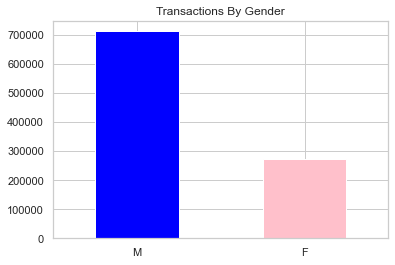

In [85]:
#visualize gender distribution
ax = df['CustGender'].value_counts().plot(kind = 'bar', color = ['blue','pink'])
plt.xticks(rotation = 0)
ax.set_title('Transactions By Gender')
plt.show()

(array([0, 1]), [Text(0, 0, 'F'), Text(1, 0, 'M')])

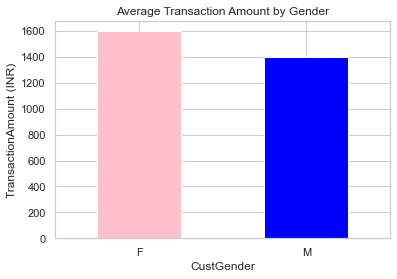

In [84]:
#transaction amount by gender
ax = df.groupby('CustGender')['TransactionAmount (INR)'].mean().plot(kind = 'bar', color = ['pink','blue'])
ax.set_ylabel('TransactionAmount (INR)')
ax.set_title('Average Transaction Amount by Gender')
plt.xticks(rotation = 0)

(array([0, 1]), [Text(0, 0, 'F'), Text(1, 0, 'M')])

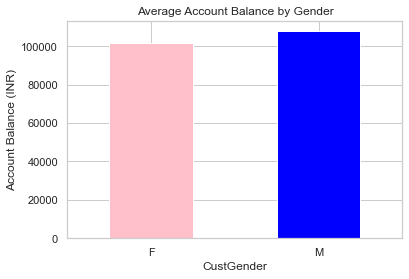

In [88]:
#transaction amount by gender
ax = df.groupby('CustGender')['CustAccountBalance'].mean().plot(kind = 'bar', color = ['pink','blue'])
ax.set_ylabel('Account Balance (INR)')
ax.set_title('Average Account Balance by Gender')
plt.xticks(rotation = 0)

Text(0, 0.5, 'Number of Transactions')

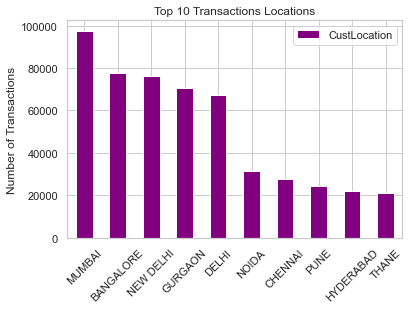

In [101]:
#visualize the distribution of transaction locations
ax1 = df['CustLocation'].value_counts().to_frame().iloc[0:10].plot(kind = 'bar', color = 'purple')
plt.xticks(rotation = 45)
ax1.set_title('Top 10 Transactions Locations')
ax1.set_ylabel('Number of Transactions')

Text(0, 0.5, 'Average Transaction Amount')

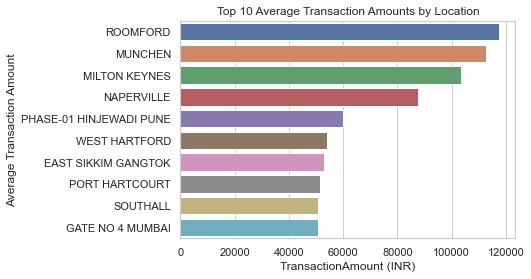

In [126]:
#top ten locations by average transaction amount
top_ten_trans = df.groupby('CustLocation')['TransactionAmount (INR)'].mean().sort_values(ascending = False)[0:10].reset_index()
sns.barplot(data = top_ten_trans, y = 'CustLocation', x = 'TransactionAmount (INR)')
plt.title('Top 10 Average Transaction Amounts by Location')
plt.ylabel('Average Transaction Amount')

In [123]:
print(top_ten_trans.columns)

Index(['CustLocation', 'TransactionAmount (INR)'], dtype='object')


Text(0, 0.5, 'Average Account Balance')

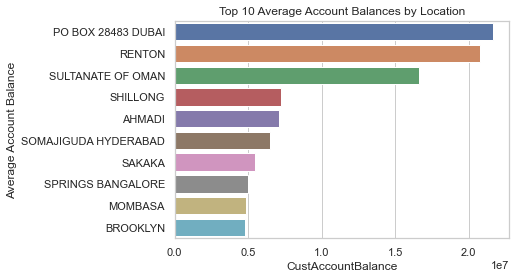

In [128]:
#top ten locations by average customer account balance
top_ten_acct = df.groupby('CustLocation')['CustAccountBalance'].mean().sort_values(ascending = False)[0:10].reset_index()
sns.barplot(data = top_ten_acct, y = 'CustLocation', x = 'CustAccountBalance')
plt.title('Top 10 Average Account Balances by Location')
plt.ylabel('Average Account Balance')

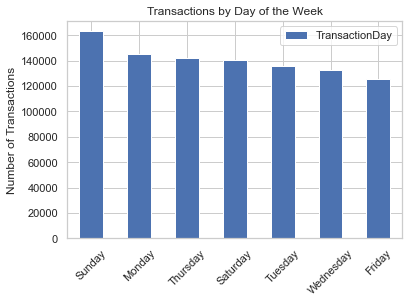

In [154]:
#visualize transactions by day
df['TransactionDay'].value_counts().to_frame().plot(kind = 'bar')
plt.title('Transactions by Day of the Week')
plt.ylabel('Number of Transactions')
plt.xticks(rotation = 45)
plt.show()

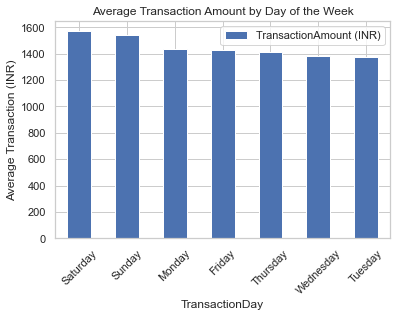

In [157]:
#visualize average transaction size by day
df3 = df[['TransactionDay','TransactionAmount (INR)']]
df3.groupby('TransactionDay')['TransactionAmount (INR)'].mean().sort_values(ascending = False).to_frame().plot(kind = 'bar')
plt.title('Average Transaction Amount by Day of the Week')
plt.ylabel('Average Transaction (INR)')
plt.xticks(rotation = 45)
plt.show()

<AxesSubplot:xlabel='Age'>

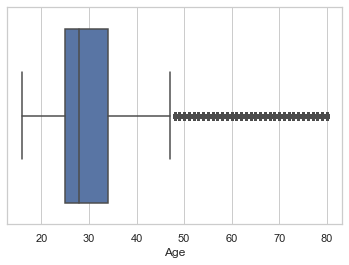

In [149]:
#visualize age distribution - restrict age to (16-80)
truncate_1 = df[df['Age'] >= 16]
truncate_2 = df[df['Age'] <= 80]
sns.boxplot(data = truncate_2, x = 'Age')

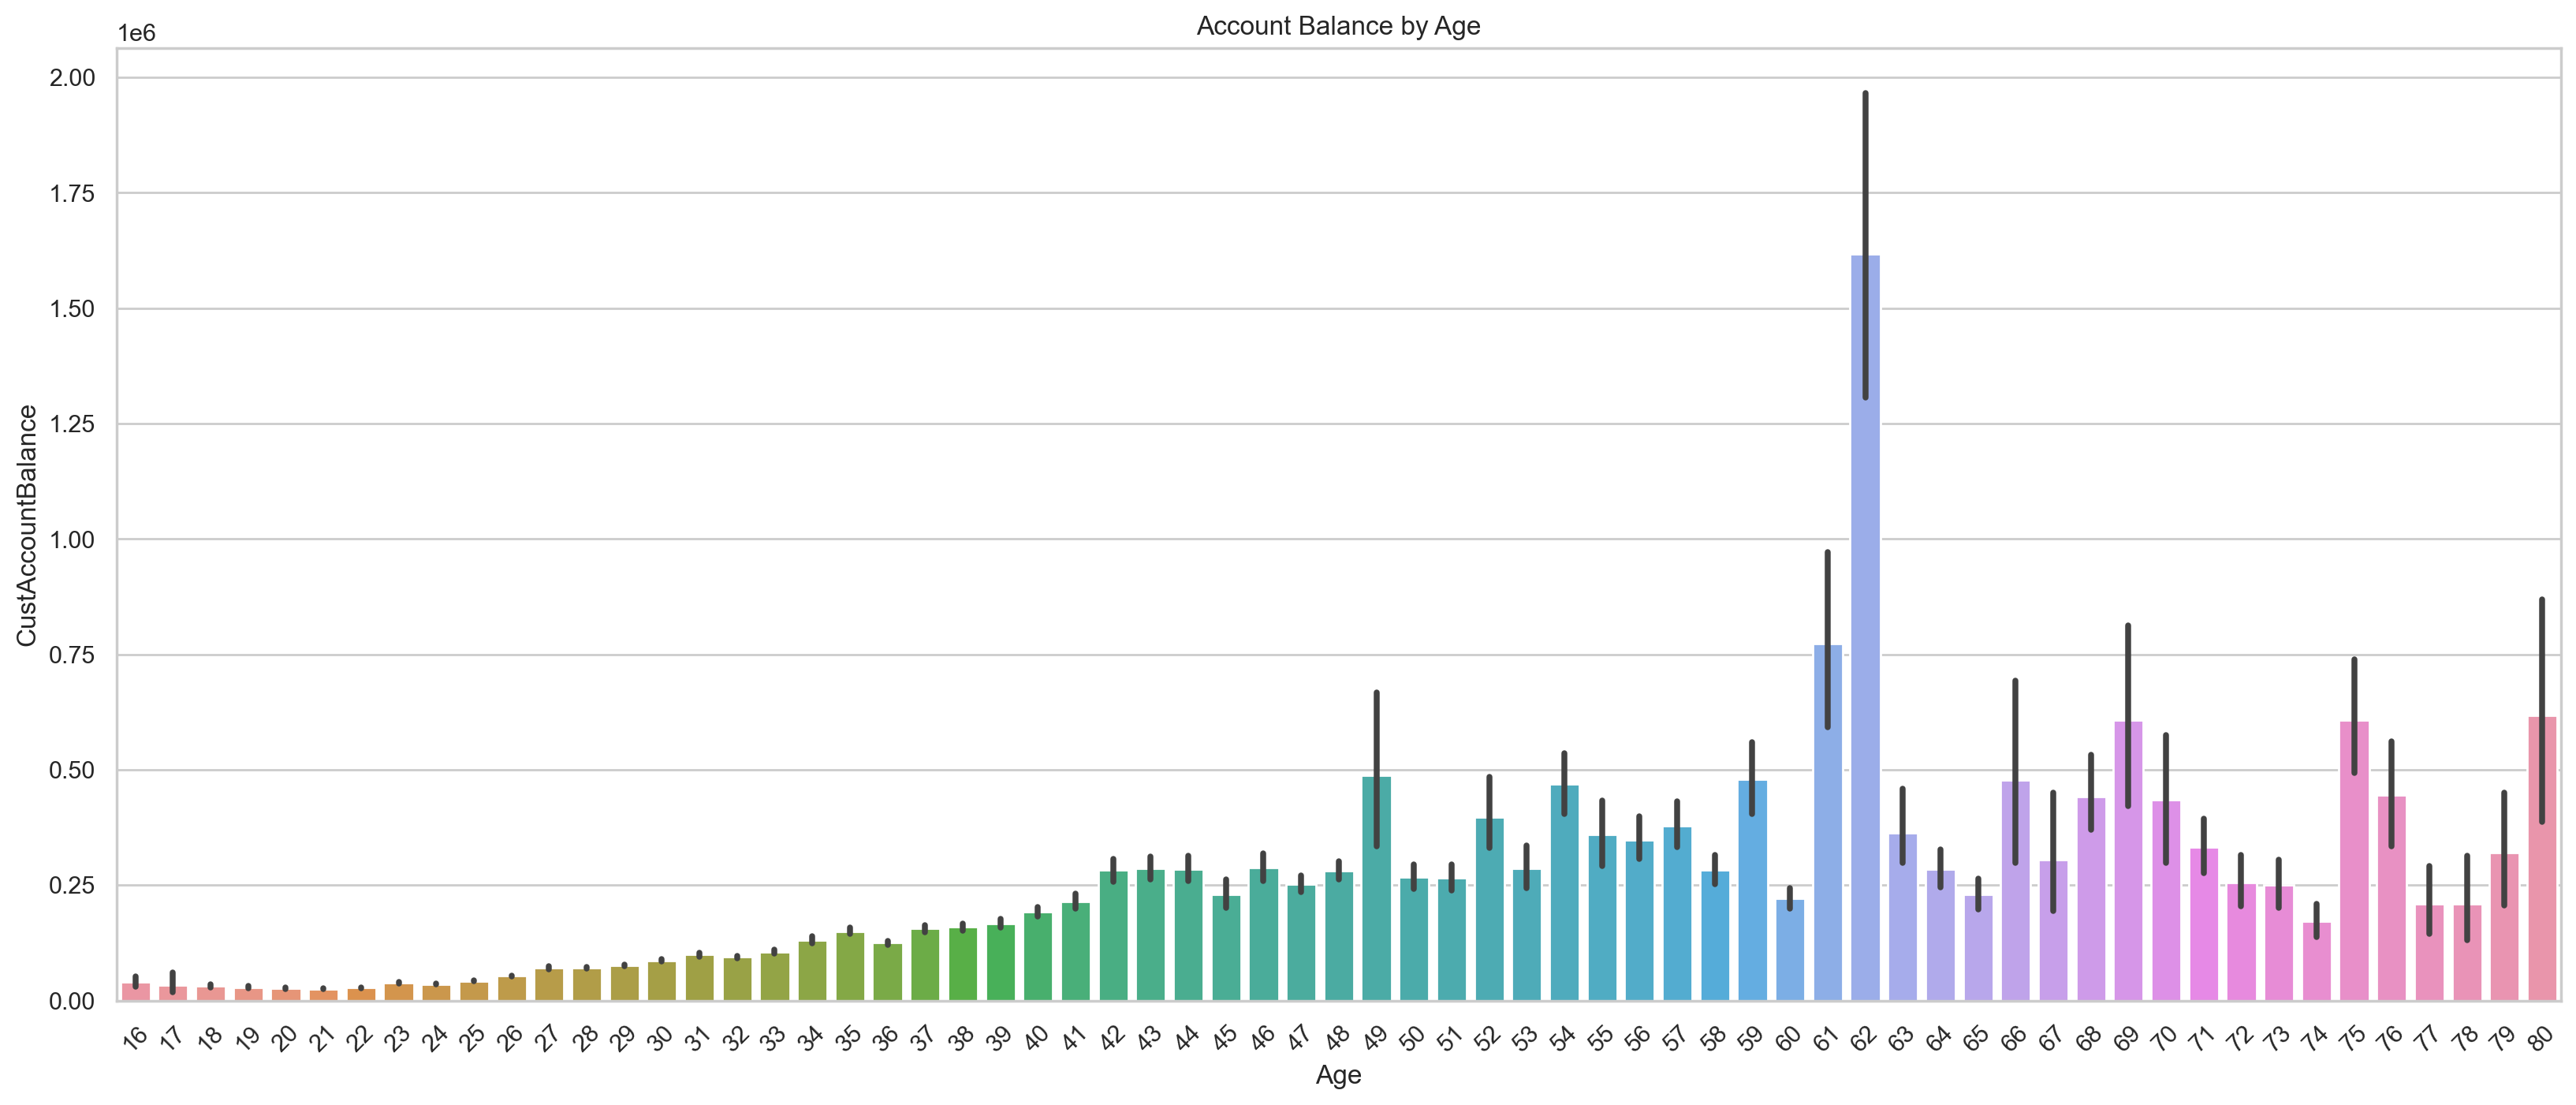

In [144]:
#visualize customer age distribution
plt.figure(figsize=(20,8), dpi = 200)
sns.barplot(data = truncate_2, x = 'Age', y = 'CustAccountBalance')
plt.xticks(rotation = 45)
plt.title('Account Balance by Age')
plt.show()

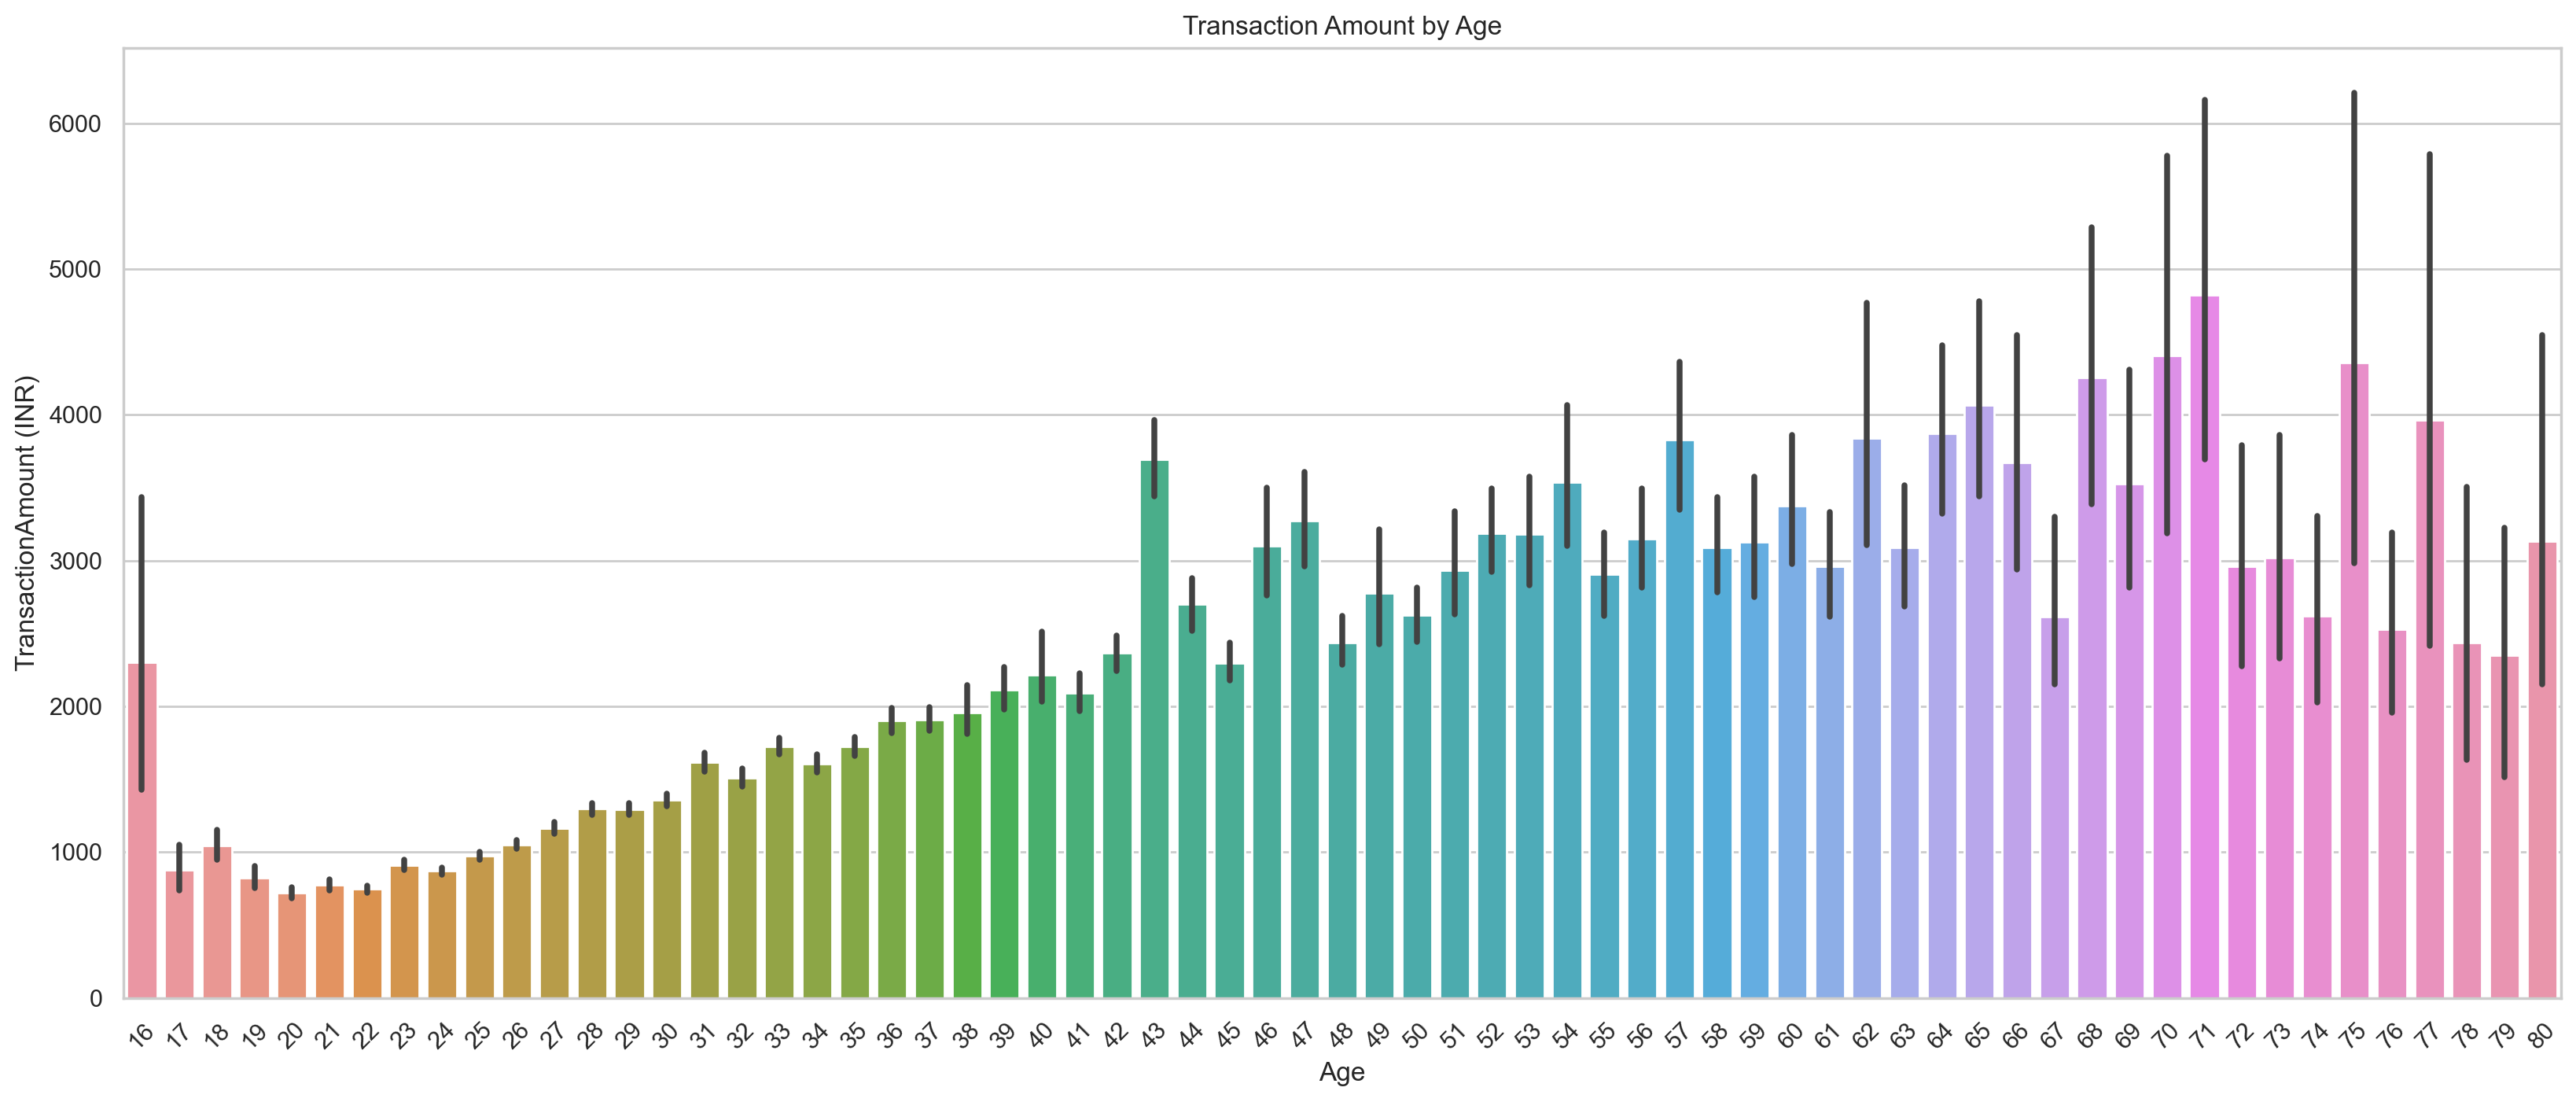

In [146]:
#visualize transaction amount by age
plt.figure(figsize=(20,8), dpi = 200)
sns.barplot(data = truncate_2, x = 'Age', y = 'TransactionAmount (INR)')
plt.xticks(rotation = 45)
plt.title('Transaction Amount by Age')
plt.show()

<AxesSubplot:>

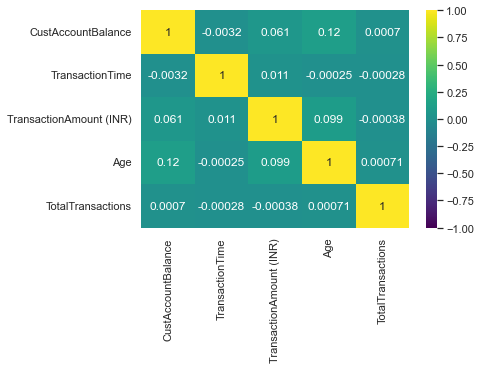

In [147]:
#correlation between variables
sns.heatmap(df.corr(),annot=True,cmap='viridis',vmin=-1,vmax=1)

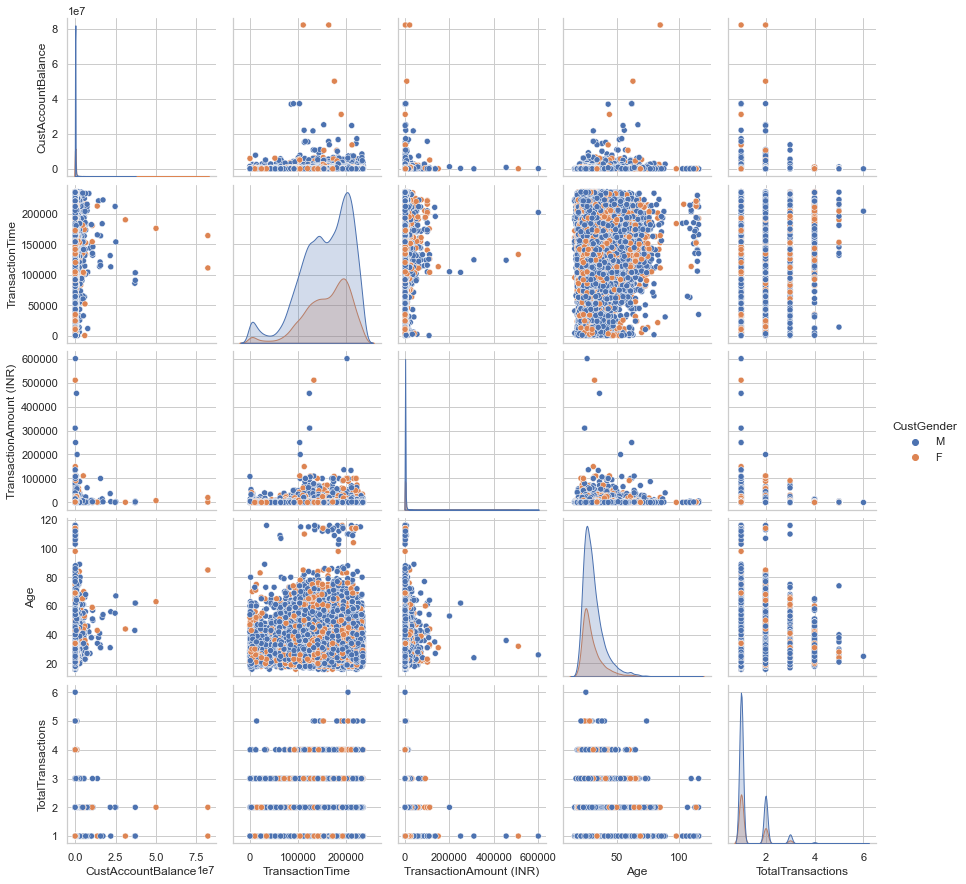

In [148]:
sns.pairplot(df.sample(n=40000),hue='CustGender')

### Feature Engineering